In [14]:
from google.colab import files
uploaded = files.upload()


Saving Speechprocessing.m4a to Speechprocessing.m4a


In [15]:
!pip install librosa soundfile scipy pydub


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from scipy.signal import resample
from pydub import AudioSegment
from IPython.display import Audio


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


In [17]:
# Convert M4A to WAV
m4a_file = "Speechprocessing.m4a"
wav_file = "myvoice.wav"

audio = AudioSegment.from_file(m4a_file, format="m4a")
audio.export(wav_file, format="wav")

print("Conversion complete: M4A → WAV")


Conversion complete: M4A → WAV


In [18]:
y, sr = librosa.load(wav_file, sr=None)

print("Sample Rate:", sr)
print("Number of Samples:", len(y))
print("Duration (seconds):", len(y)/sr)


Sample Rate: 44100
Number of Samples: 579584
Duration (seconds): 13.142494331065759


In [28]:
info = sf.info(wav_file)
print("Bit Depth:", info.subtype)

Bit Depth: PCM_16


In [19]:
Audio(y, rate=sr)


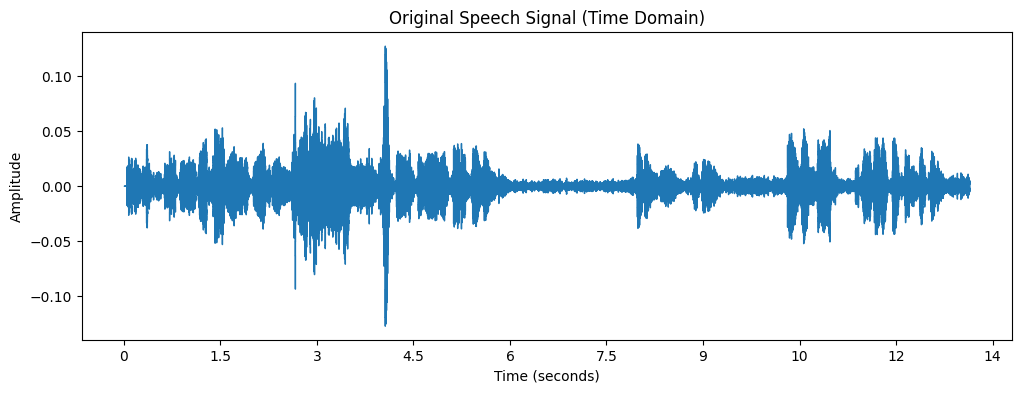

In [20]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(y, sr=sr)
plt.title("Original Speech Signal (Time Domain)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [21]:
frame_length = 1024
hop_length = 512

energy = np.array([
    np.sum(np.abs(y[i:i+frame_length]**2))
    for i in range(0, len(y), hop_length)
])

threshold = np.mean(energy) * 0.1
active_frames = energy > threshold
active_duration = np.sum(active_frames) * (hop_length/sr)

print("Total Duration:", len(y)/sr, "seconds")
print("Active Speech Duration:", active_duration, "seconds")


Total Duration: 13.142494331065759 seconds
Active Speech Duration: 9.682721088435374 seconds


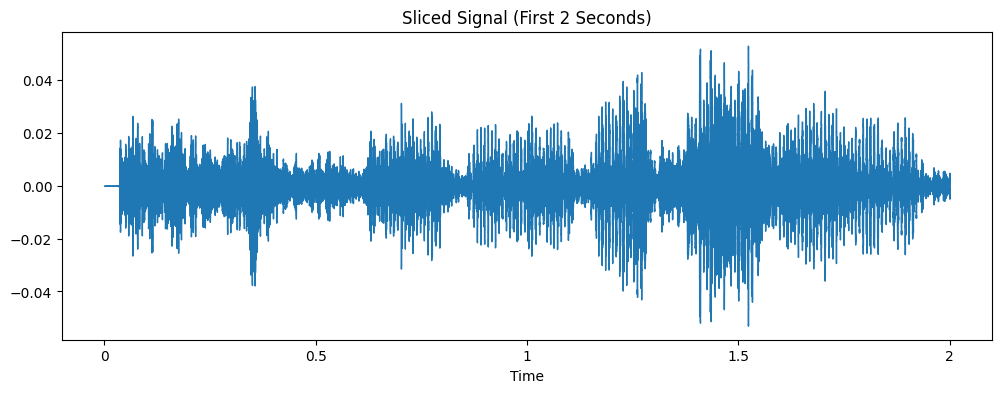

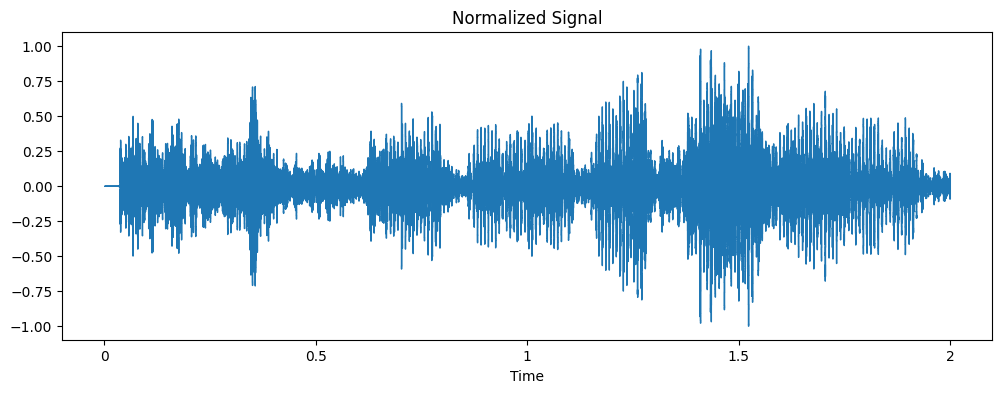

In [22]:
# Extract first 2 seconds
slice_duration = 2  # seconds
num_samples = int(slice_duration * sr)
y_slice = y[:num_samples]

# Normalize
y_norm = y_slice / np.max(np.abs(y_slice))

# Plot Sliced Signal
plt.figure(figsize=(12,4))
librosa.display.waveshow(y_slice, sr=sr)
plt.title("Sliced Signal (First 2 Seconds)")
plt.show()

# Plot Normalized Signal
plt.figure(figsize=(12,4))
librosa.display.waveshow(y_norm, sr=sr)
plt.title("Normalized Signal")
plt.show()


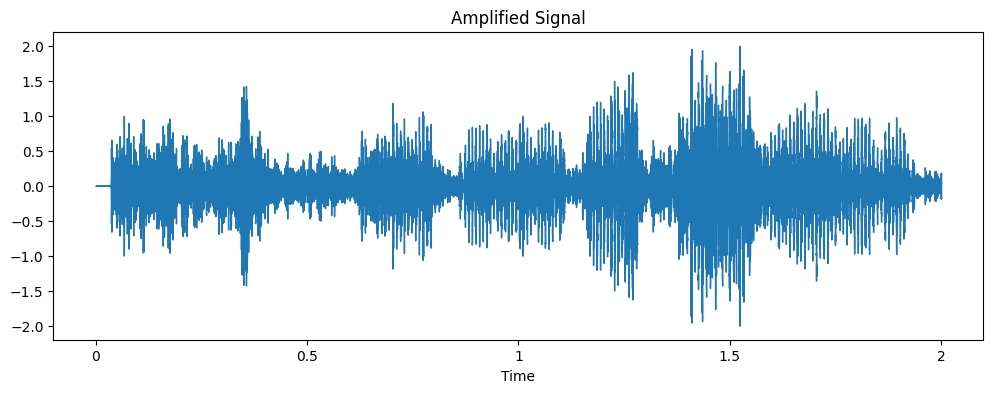

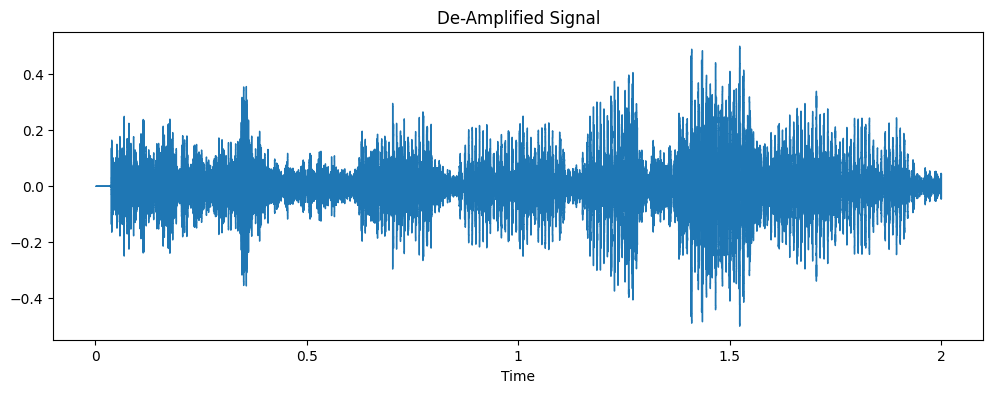

In [23]:
# Amplification
y_amp = y_norm * 2

# De-amplification
y_deamp = y_norm * 0.5

plt.figure(figsize=(12,4))
librosa.display.waveshow(y_amp, sr=sr)
plt.title("Amplified Signal")
plt.show()

plt.figure(figsize=(12,4))
librosa.display.waveshow(y_deamp, sr=sr)
plt.title("De-Amplified Signal")
plt.show()


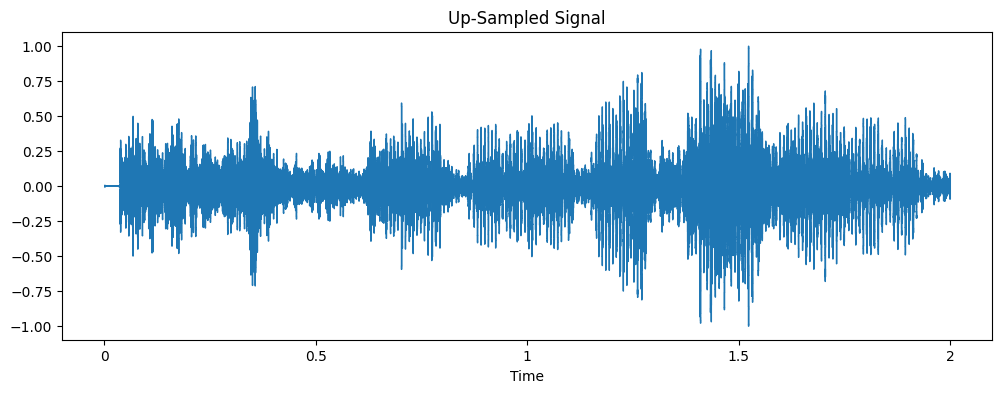

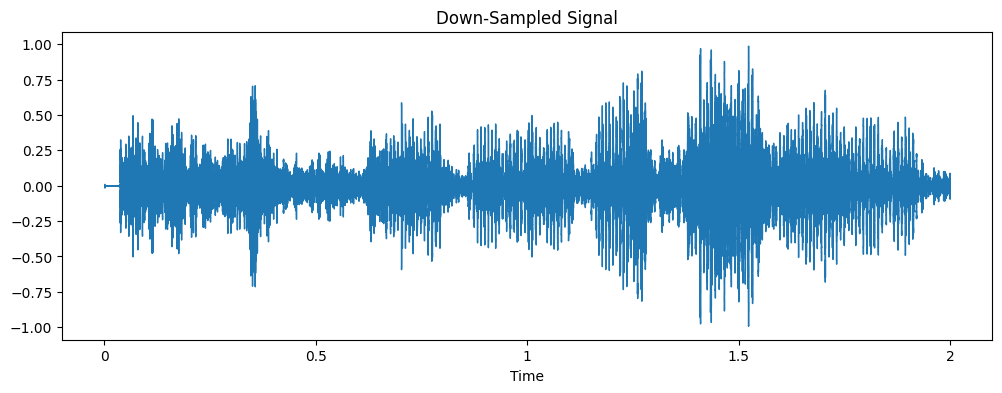

In [24]:
# Up-sampling (2x)
y_up = resample(y_norm, len(y_norm)*2)

# Down-sampling (0.5x)
y_down = resample(y_norm, len(y_norm)//2)

plt.figure(figsize=(12,4))
librosa.display.waveshow(y_up, sr=sr*2)
plt.title("Up-Sampled Signal")
plt.show()

plt.figure(figsize=(12,4))
librosa.display.waveshow(y_down, sr=sr//2)
plt.title("Down-Sampled Signal")
plt.show()


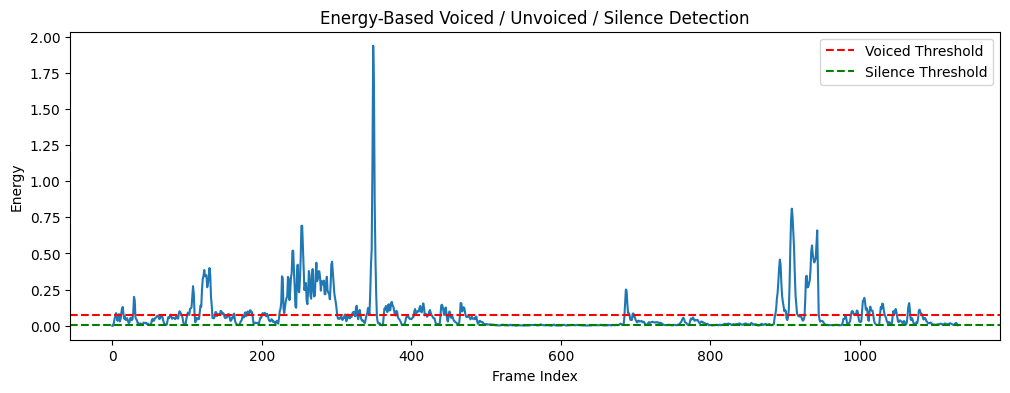

In [25]:
plt.figure(figsize=(12,4))
plt.plot(energy)
plt.axhline(np.mean(energy), color='r', linestyle='--', label='Voiced Threshold')
plt.axhline(np.mean(energy)*0.1, color='g', linestyle='--', label='Silence Threshold')
plt.title("Energy-Based Voiced / Unvoiced / Silence Detection")
plt.xlabel("Frame Index")
plt.ylabel("Energy")
plt.legend()
plt.show()


In [26]:
Audio(y_norm, rate=sr) #only the processed


In [27]:
Audio(y, rate=sr) #want full means

